In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [43]:
# import cufflinks as cf
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected = True)
# cf.go_offline()

In [127]:
my_path = "/training_set/"

In [34]:
# Create hue array
x = np.arange(1,196)
len(x)

195

In [135]:
# Read data from CSV
a = pd.read_csv("/training_set/apples_analysis_data/hue_apples_array.csv")
b = pd.read_csv("/training_set/bananas_analysis_data/hue_bananas_array.csv")

In [136]:
#Convert to numpy array
app = a.to_numpy()
ba = b.to_numpy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



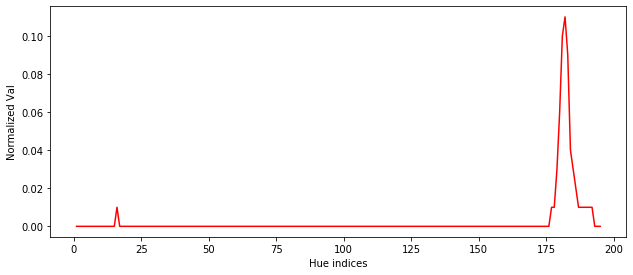

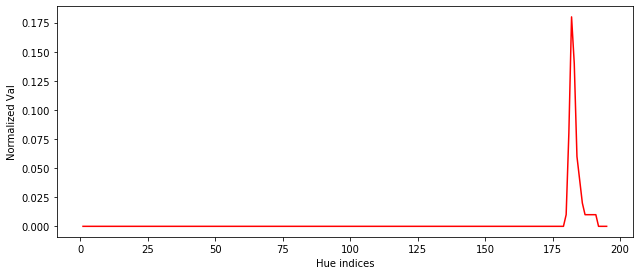

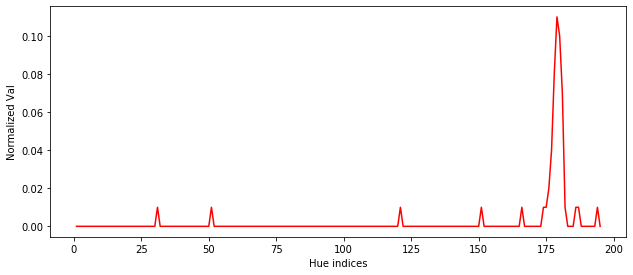

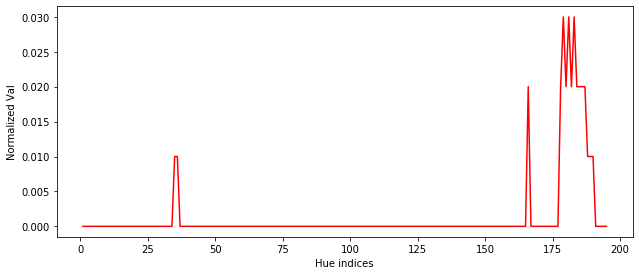

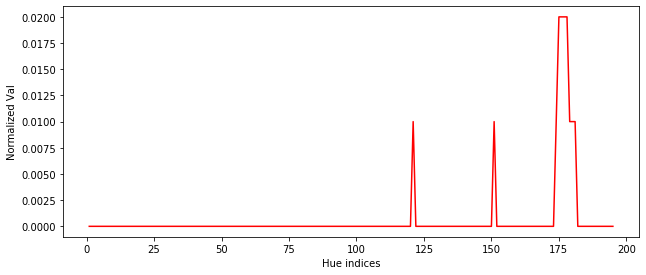

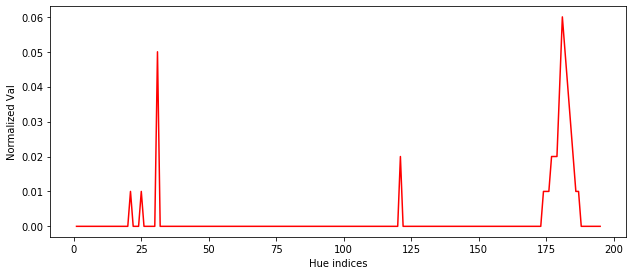

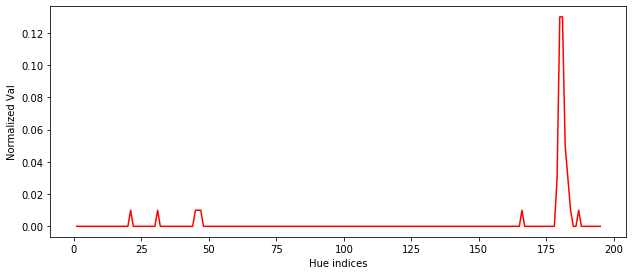

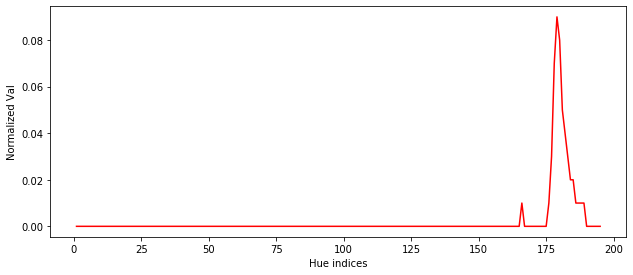

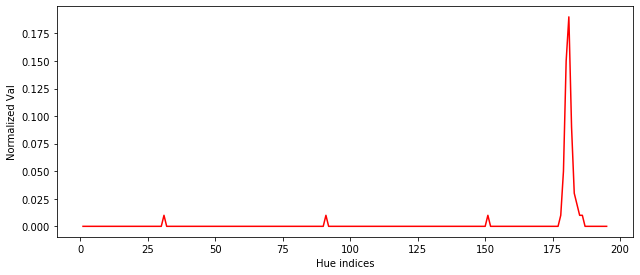

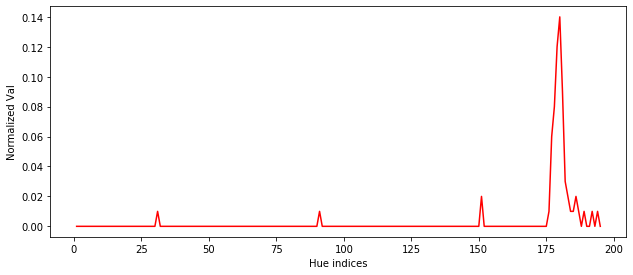

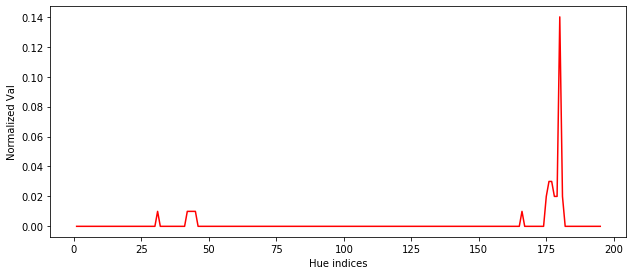

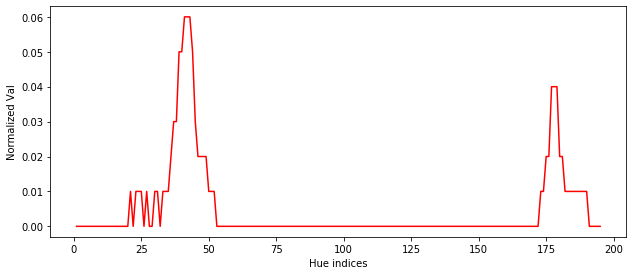

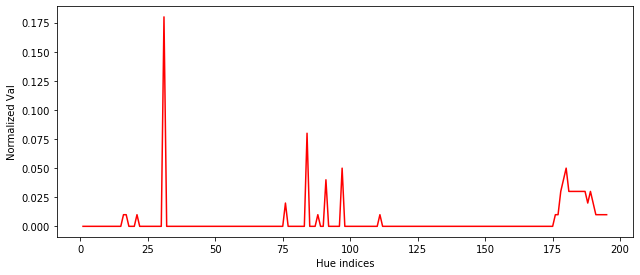

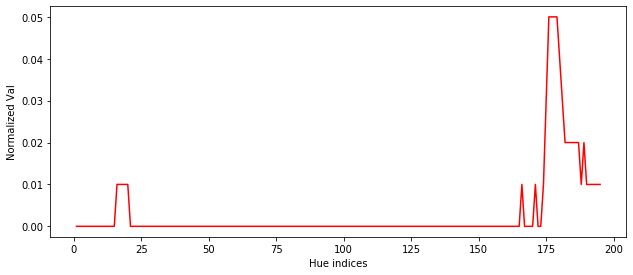

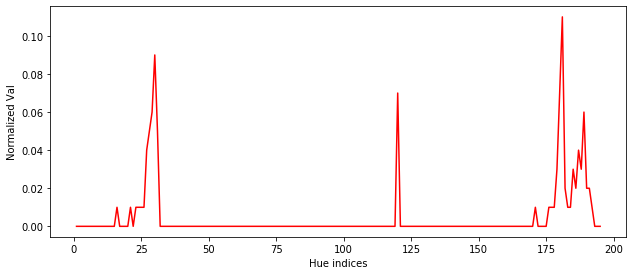

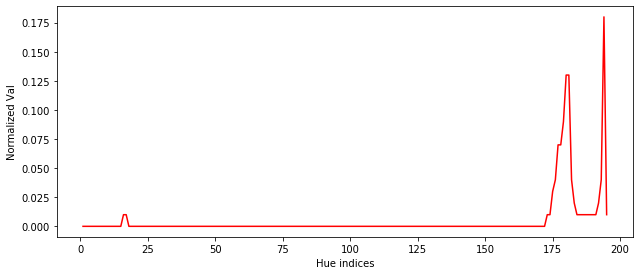

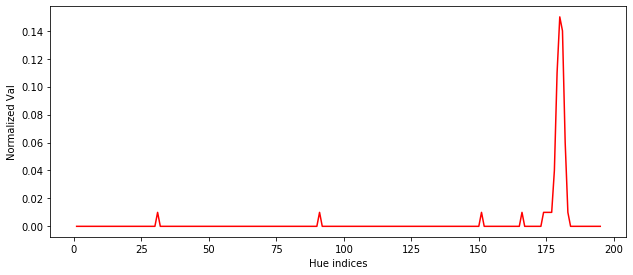

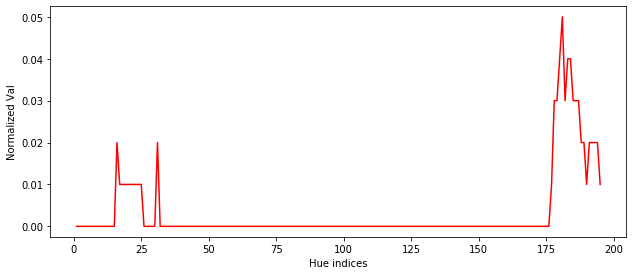

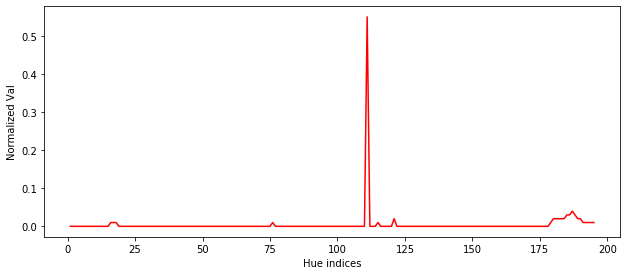

In [133]:
# Plot hue distribution for individual image
for i in range(0, len(app)):
# #Object Oriented method
    fig = plt.figure(figsize=(10,4)) # we create a blank canvas
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax.plot(x,app[i][:],'r')
    ax.set_xlabel('Hue indices')
    ax.set_ylabel('Normalized Val')
    plt.tight_layout()
    plt.savefig(str(my_path) + "apples_analysis_data/image" + str(i) + ".png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



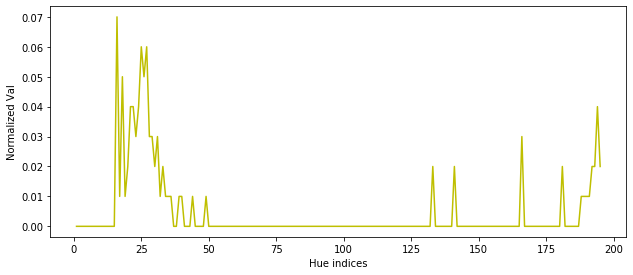

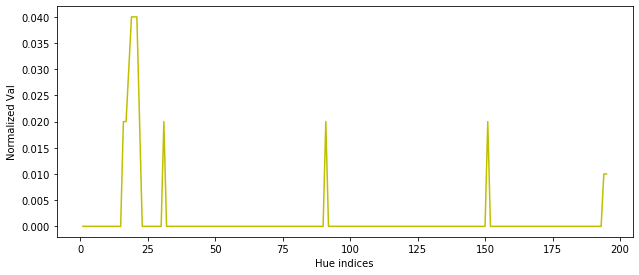

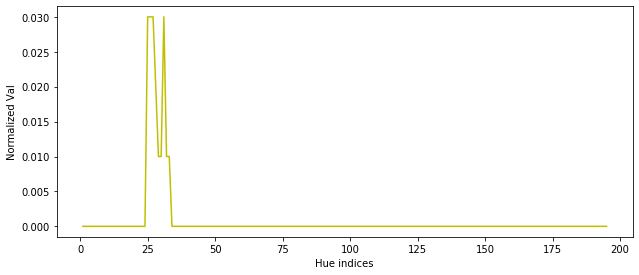

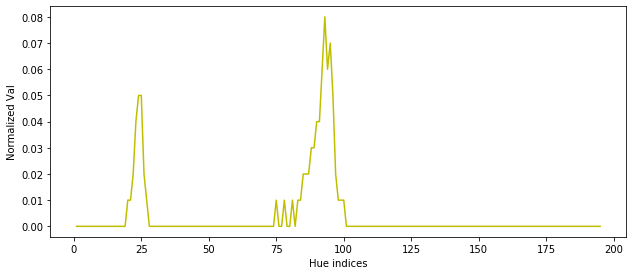

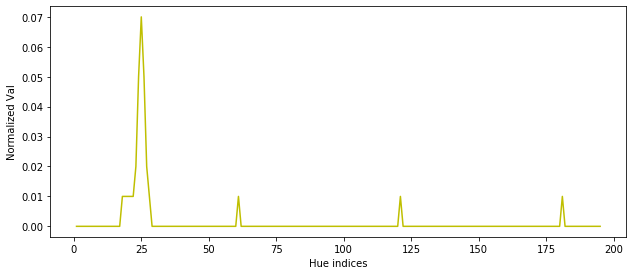

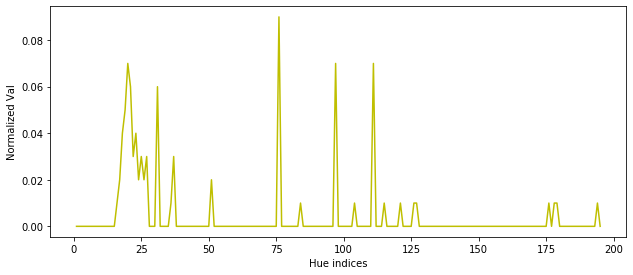

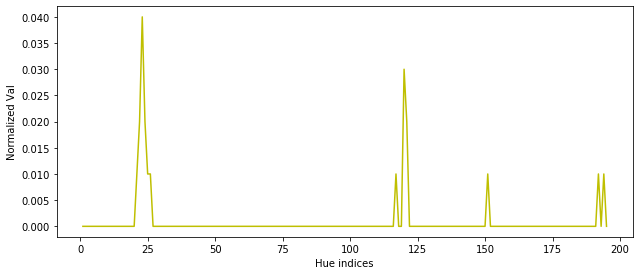

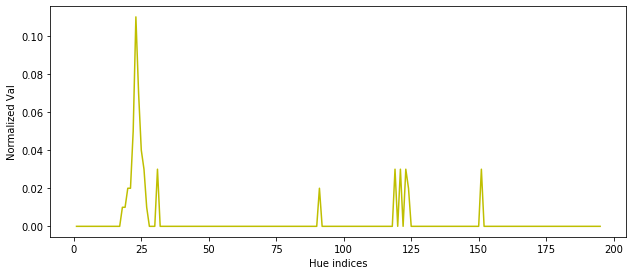

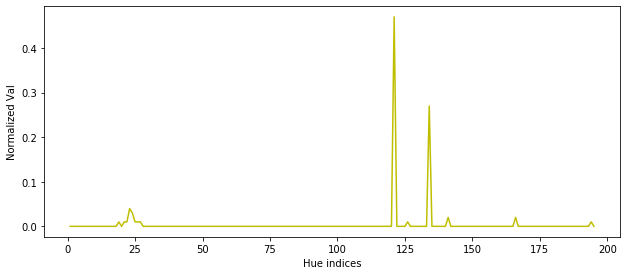

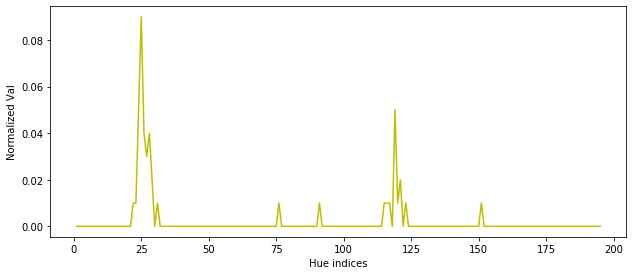

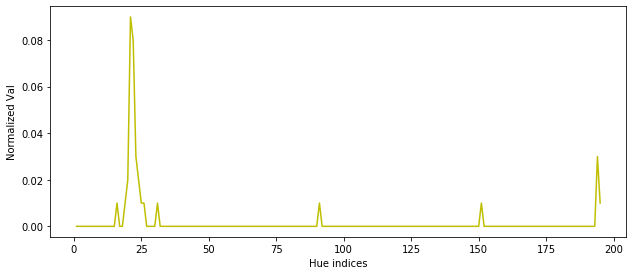

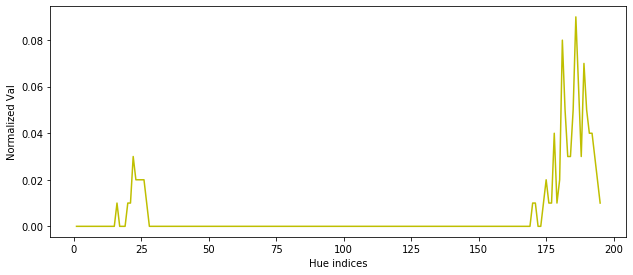

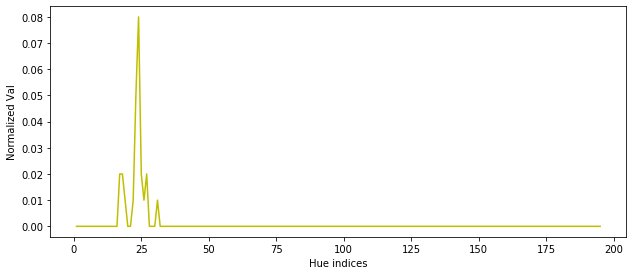

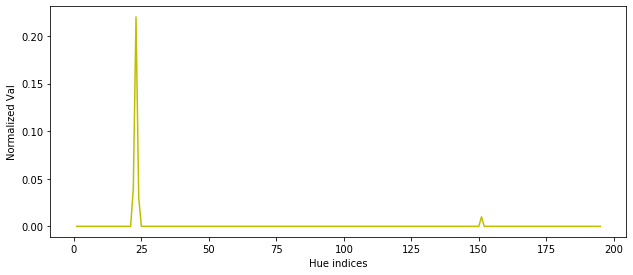

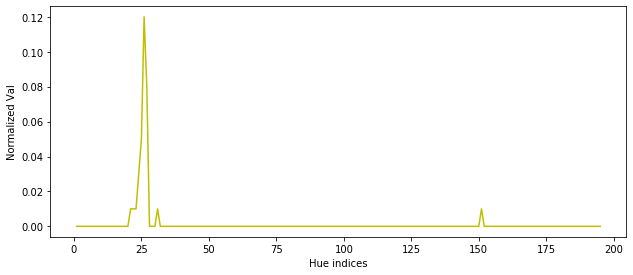

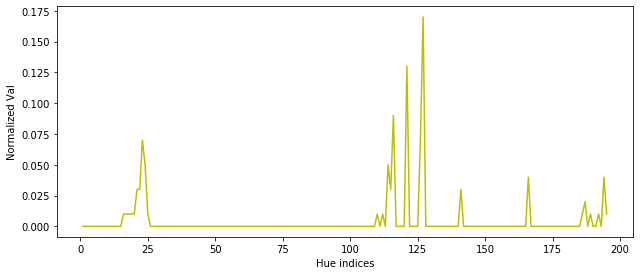

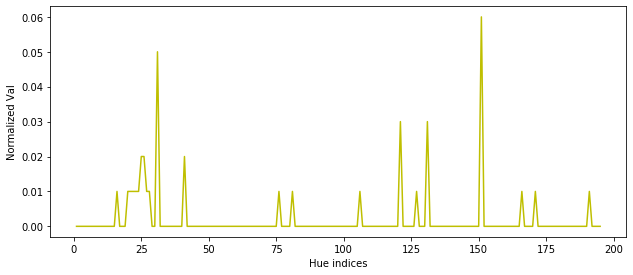

In [134]:
# Plot hue distribution for individual image
for i in range(0, len(ba)):
# #Object Oriented method
    fig = plt.figure(figsize=(10,4)) # we create a blank canvas
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax.plot(x,ba[i][:],'y')
    ax.set_xlabel('Hue indices')
    ax.set_ylabel('Normalized Val')
    plt.savefig(str(my_path) + "bananas_analysis_data/image" + str(i) + ".png")

In [137]:
# Calculate aggregate hue for all apple and banana images
apple_final_arr = []
for i in range(0,195):
    sum = 0.0
    for j in range(0, len(app)):
        sum = sum + app[j][i]
    apple_final_arr.append(sum)

banana_final_arr = []
for i in range(0,195):
    sum = 0.0
    for j in range(0, len(ba)):
        sum = sum + ba[j][i]
    banana_final_arr.append(sum)


In [138]:
# Calculate centroid for apples and bananas
def centroid_cal(x, arr):
    sum_i, sum_j = 0.0, 0.0
    for i,j in zip(x, arr):
        sum_j = sum_j + j
        sum_i = sum_i + (float(i) * j)
    print(sum_i, sum_j)
    centroid = sum_i / sum_j
    return centroid, 0

banana_centroid = centroid_cal(x, banana_final_arr)
apple_centroid = centroid_cal(x, apple_final_arr)

702.3400000000001 9.079999999999991
1792.01 11.640000000000002


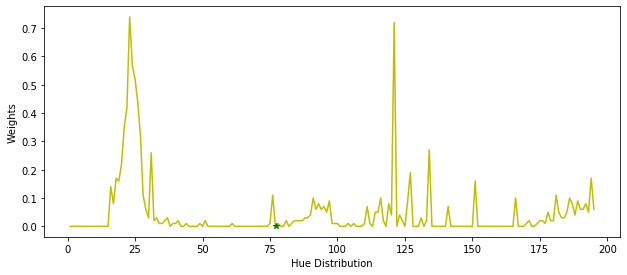

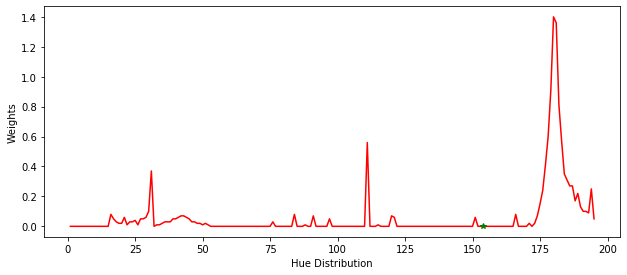

In [139]:
# Plot Apple's Hue distribution and centroid
x = np.arange(1,196)
fig = plt.figure(figsize=(10,4)) # we create a blank canvas
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, banana_final_arr[:],'y')
ax.set_xlabel("Hue Distribution")
ax.set_ylabel("Weights")
plt.plot(banana_centroid[0], banana_centroid[1] , 'g*')

# Plot Bananas's Hue distribution and centroid
x = np.arange(1,196)
fig = plt.figure(figsize=(10,4)) # we create a blank canvas
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, apple_final_arr[:],'r')
ax.set_xlabel("Hue Distribution")
ax.set_ylabel("Weights")
plt.plot(apple_centroid[0], apple_centroid[1], 'g*')